# _How to Interpolate Data with Scipy_

## Dr. Tirthajyoti Sarkar

---

https://github.com/tirthajyoti/Stats-Maths-with-Python/blob/master/Scipy-interpolate.ipynb

In [1]:
from scipy.interpolate import interp1d
import numpy as np, matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
NUM_DATA = 11
NUM_INTERPOLATE = 41

## Linear interpolation

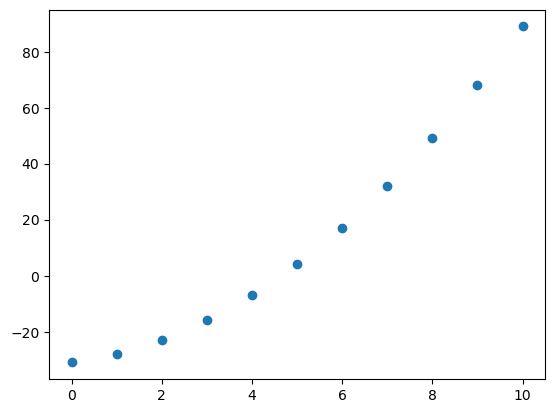

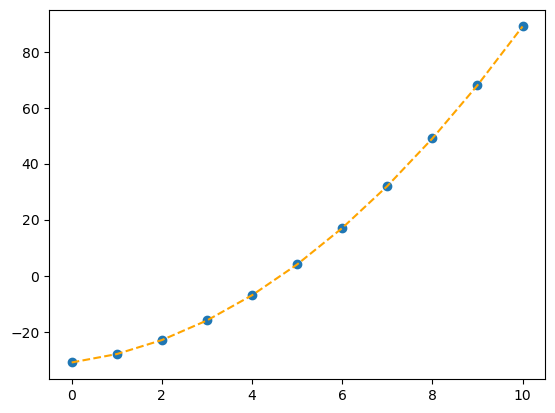

In [3]:
x = np.linspace(0, 10, num=NUM_DATA, endpoint=True)
y = x**2+2*x-31

f1 = interp1d(x, y, kind='linear')
xnew = np.linspace(0, 10, num=NUM_INTERPOLATE, endpoint=True)

plt.scatter(x, y)
plt.show()
plt.scatter(x, y)
plt.plot(xnew, f1(xnew), color='orange',linestyle='--')
plt.show()

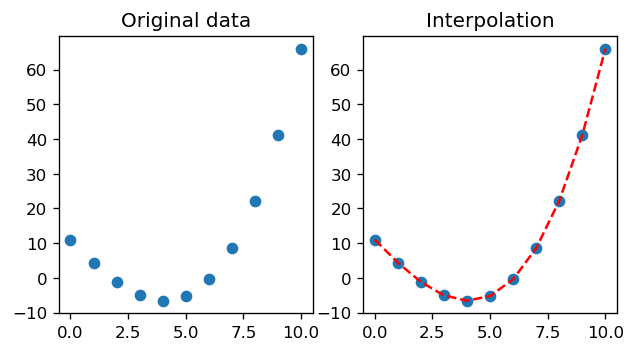

In [4]:
x = np.linspace(0, 10, num=NUM_DATA, endpoint=True)
y = 0.1*x**3+0.25*x**2-7*x+11

f1 = interp1d(x, y, kind='linear')
xnew = np.linspace(0, 10, num=NUM_INTERPOLATE, endpoint=True)

fig, ax  = plt.subplots(1,2,figsize=(6,3),dpi=120)
ax[0].scatter(x, y)
ax[0].set_title("Original data")
ax[1].scatter(x, y)
ax[1].plot(xnew, f1(xnew), color='red',linestyle='--')
ax[1].set_title("Interpolation")
plt.show()

## Non-polynomial data

In [5]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)+np.sin(x/6)

In [6]:
f = interp1d(x, y)
f3 = interp1d(x, y, kind='cubic')

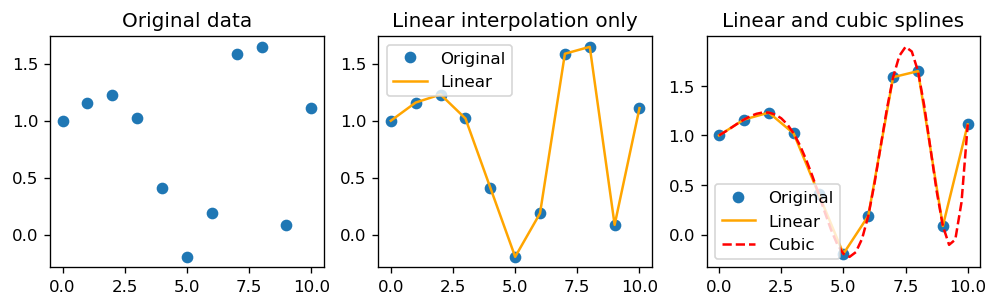

In [7]:
xnew = np.linspace(0, 10, num=41, endpoint=True)
fig, ax  = plt.subplots(1,3,figsize=(10,2.5),dpi=120)

ax[0].scatter(x,y)
ax[0].set_title("Original data")
ax[1].plot(x, y, 'o')
ax[1].plot(xnew, f(xnew), color='orange',linestyle='-')
ax[1].legend(['Original','Linear'])
ax[1].set_title("Linear interpolation only")
ax[2].plot(x, y, 'o')
ax[2].plot(xnew, f(xnew), color='orange',linestyle='-')
ax[2].plot(xnew, f3(xnew), color='red',linestyle='--')
ax[2].legend(['Original','Linear','Cubic'])
ax[2].set_title("Linear and cubic splines")
plt.show()

## Interpolation and curve-fitting are different

In [8]:
x = np.linspace(0, 10, num=NUM_DATA, endpoint=True)
y = 0.1*x**3+0.25*x**2-7*x+11+ x*np.random.normal(size=NUM_DATA)

In [9]:
f1 = interp1d(x, y, kind='linear')

from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a*x**2+b*x+c
def fitted_func(x):
    a1,b1,c1 = popt
    return a1*x**2+b1*x+c1

popt, _ = curve_fit(func, x, y)

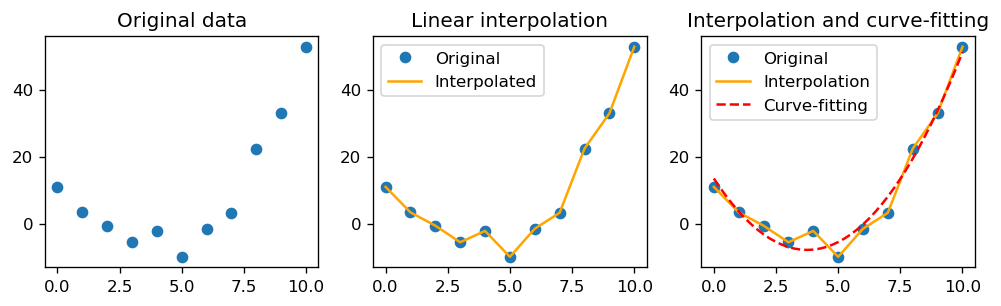

In [10]:
xnew = np.linspace(0, 10, num=41, endpoint=True)
fig, ax  = plt.subplots(1,3,figsize=(10,2.5),dpi=120)

ax[0].scatter(x,y)
ax[0].set_title("Original data")
ax[1].plot(x, y, 'o')
ax[1].plot(xnew, f1(xnew), color='orange',linestyle='-')
ax[1].legend(['Original','Interpolated'])
ax[1].set_title("Linear interpolation")
ax[2].plot(x, y, 'o')
ax[2].plot(xnew, f1(xnew), color='orange',linestyle='-')
ax[2].plot(xnew, fitted_func(xnew), color='red',linestyle='--')
ax[2].legend(['Original','Interpolation','Curve-fitting'])
ax[2].set_title("Interpolation and curve-fitting")
plt.show()

## Two-dimensional example

In [11]:
x_edges, y_edges = np.mgrid[-1:1:21j, -1:1:21j]
x = x_edges[:-1, :-1] + np.diff(x_edges[:2, 0])[0] / 2.
y = y_edges[:-1, :-1] + np.diff(y_edges[0, :2])[0] / 2.
z = (x+y) * np.exp(-6.0*(x*x+y*y))

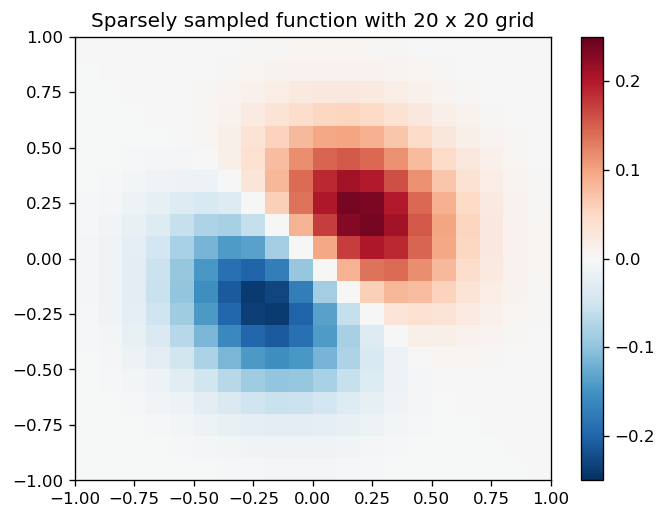

In [12]:
plt.figure(dpi=120)
lims = dict(cmap='RdBu_r', vmin=-0.25, vmax=0.25)
plt.pcolormesh(x_edges, y_edges, z, shading='flat', **lims)
plt.colorbar()
plt.title("Sparsely sampled function with 20 x 20 grid")
plt.show()

In [13]:
xnew_edges, ynew_edges = np.mgrid[-1:1:71j, -1:1:71j]
xnew = xnew_edges[:-1, :-1] + np.diff(xnew_edges[:2, 0])[0] / 2.
ynew = ynew_edges[:-1, :-1] + np.diff(ynew_edges[0, :2])[0] / 2.
interp = interpolate.bisplrep(x, y, z, s=0)
znew = interpolate.bisplev(xnew[:,0], ynew[0,:], interp)

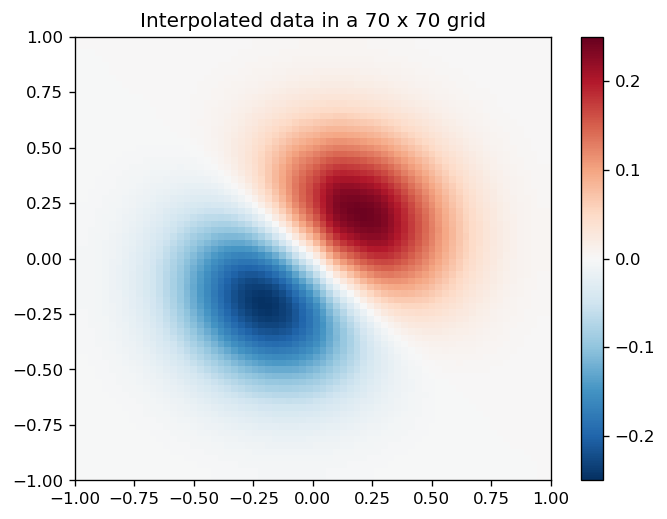

In [14]:
plt.figure(dpi=120)
plt.pcolormesh(xnew_edges, ynew_edges, znew, shading='flat', **lims)
plt.colorbar()
plt.title("Interpolated data in a 70 x 70 grid")
plt.show()